In [23]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the data to python environment**

In [24]:
wine_data=pd.read_csv('/content/Wine_clust .csv')
wine_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [25]:
##info
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [26]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##Preprocessing

**Finding Missing Values**

In [27]:
wine_data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No missing values

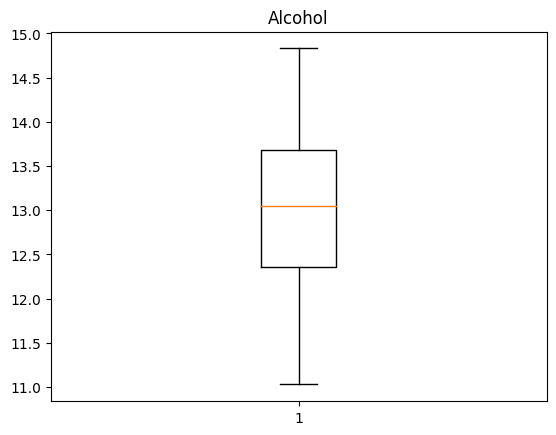

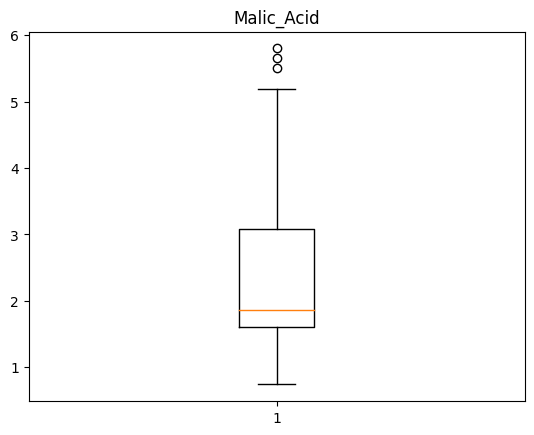

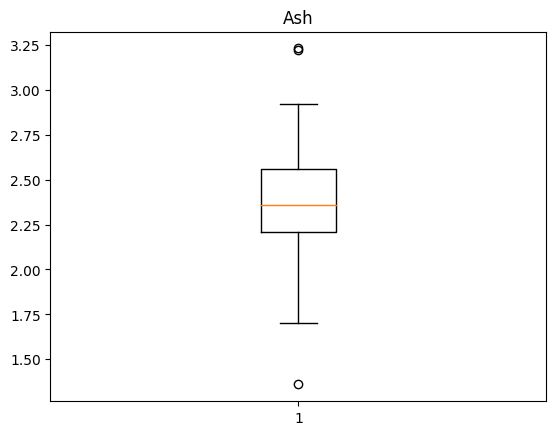

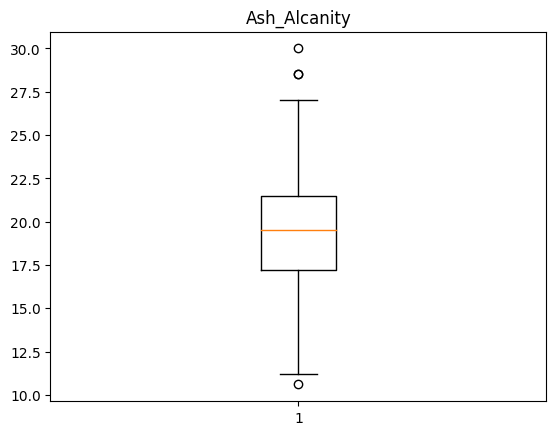

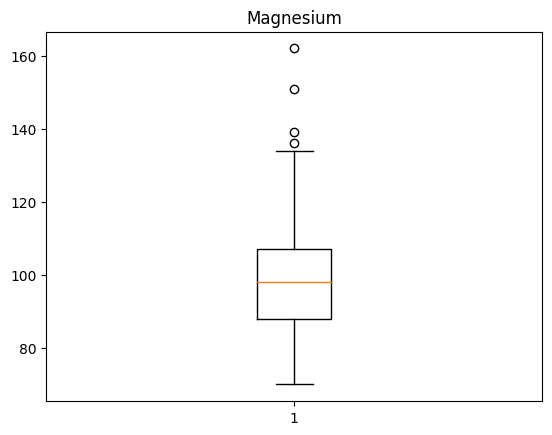

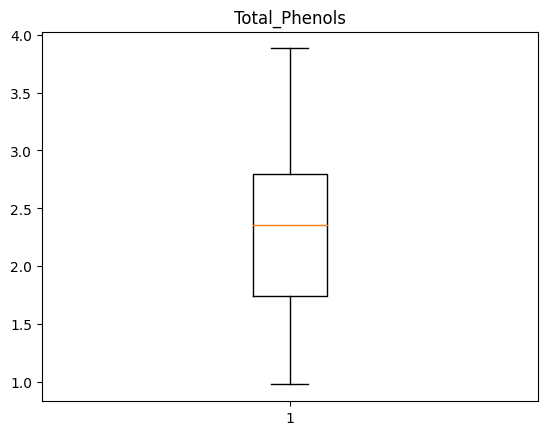

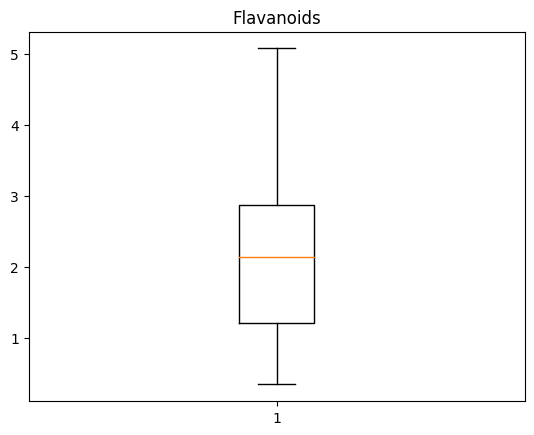

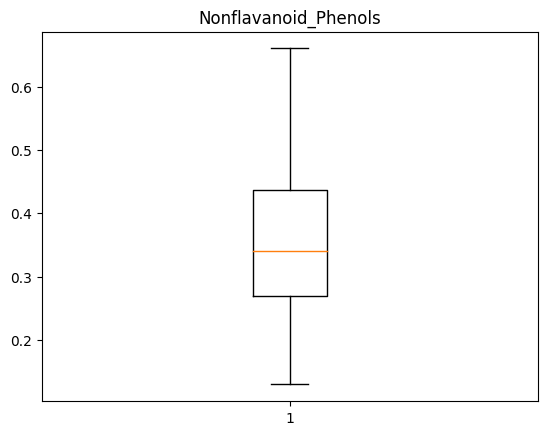

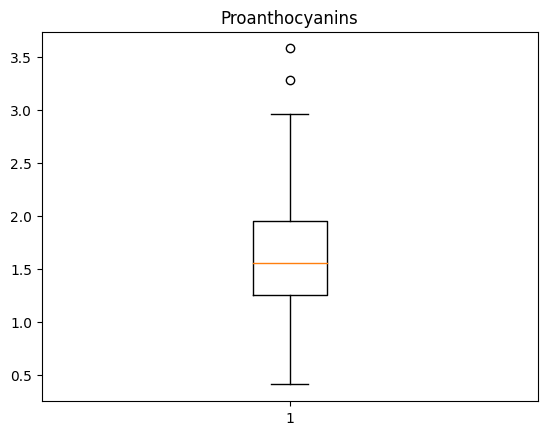

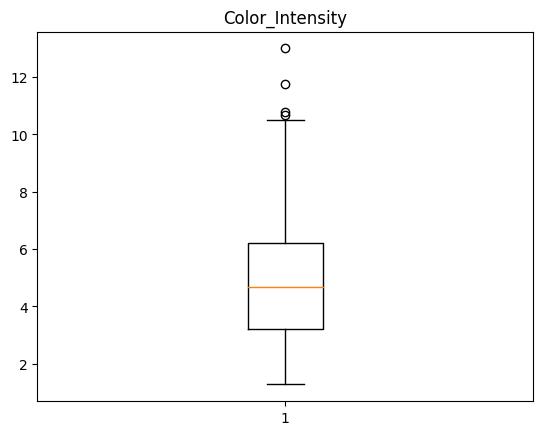

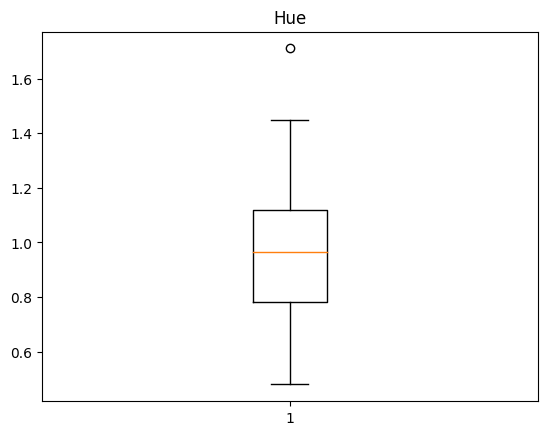

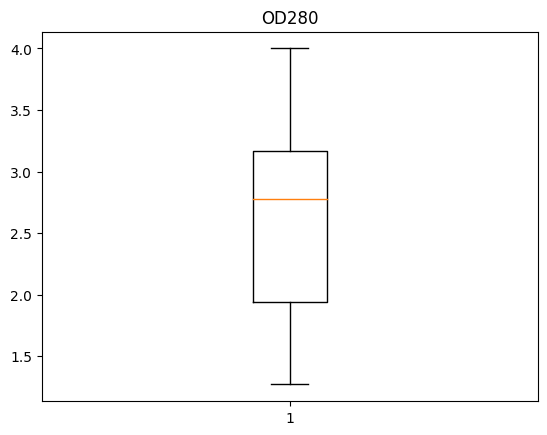

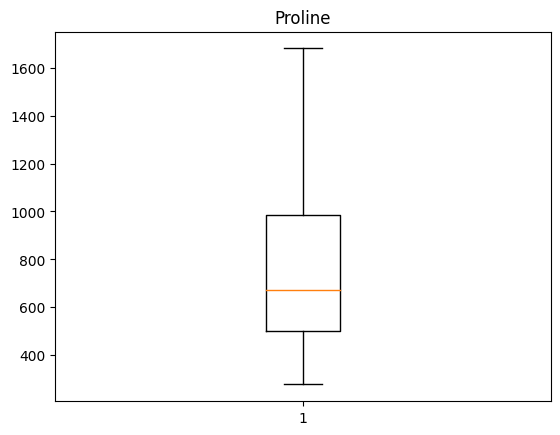

In [28]:
num_columns=['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']
for i in num_columns:
  plt.boxplot(wine_data[i])
  plt.title(i)
  plt.show()

**Correlation**

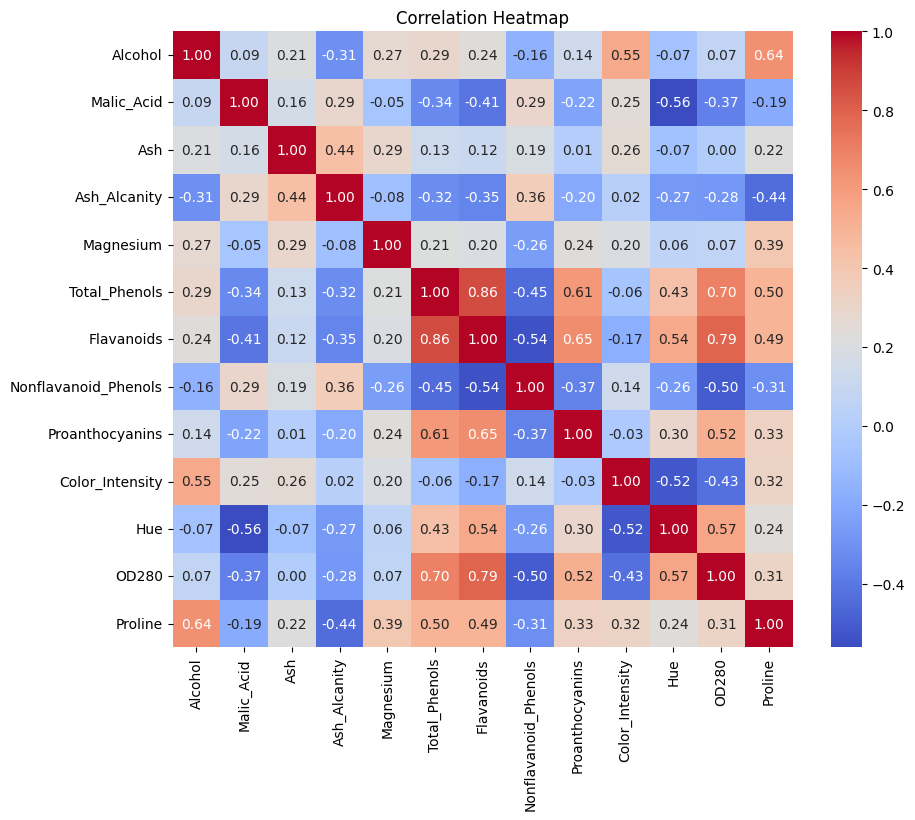

In [29]:
##Correlation
# Compute correlation matrix
correlation_matrix = wine_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [30]:
# I'll create a function to check which feature are lineraly correlated and what is the correlation coefficient
# For each column (variable), it applies a lambda function to each correlation coefficient in that column.
# checks if the absolute value of the correlation coefficient is > 0.70 (strong correlation) and < 1 (ensuring != 1, which would represent perfect correlation).

# If the condition is met,  the correlation coefficient is between 0.70 and 1 (exclusive), the coefficient value is retained.
# Otherwise, it is replaced with an empty string ('').

def corr_matrix(data):
    corr_matrix = data.corr()

    for var in corr_matrix.columns:
        corr_matrix[var] = corr_matrix[var].apply(lambda x:x if abs(x) > 0.70 and abs(x) < 1 else '')

    return corr_matrix

In [31]:
corr_matrix(wine_data)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,,,,,,,,,,,,,
Malic_Acid,,,,,,,,,,,,,
Ash,,,,,,,,,,,,,
Ash_Alcanity,,,,,,,,,,,,,
Magnesium,,,,,,,,,,,,,
Total_Phenols,,,,,,,0.864564,,,,,,
Flavanoids,,,,,,0.864564,,,,,,0.787194,
Nonflavanoid_Phenols,,,,,,,,,,,,,
Proanthocyanins,,,,,,,,,,,,,
Color_Intensity,,,,,,,,,,,,,


**Scaling**

In [32]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(wine_data)

**MODEL DEVELOPMENT**

In [33]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

##KMeans Clustering

In [34]:
# Calculate WCSS for different numbers of clusters
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

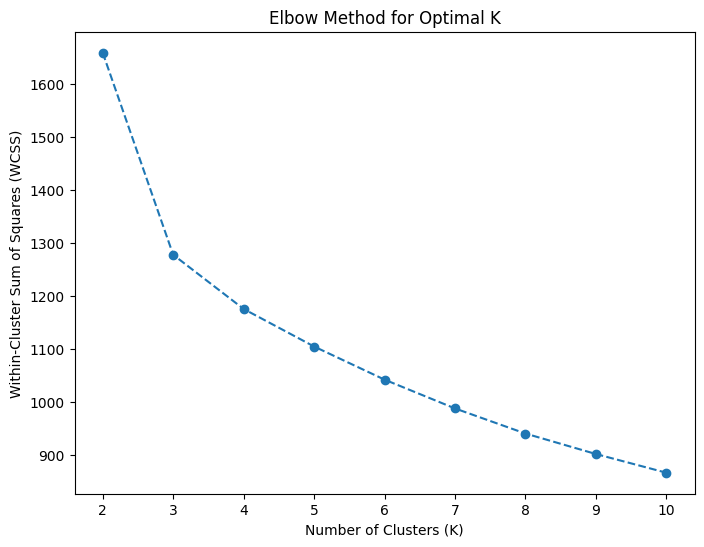

In [35]:
# Plot the elbow curve to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [38]:
# Using the optimal number of clusters (3) for KMeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Adding cluster labels to the original dataframe
wine_data['Cluster'] = kmeans.labels_

# Compute silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)



Silhouette Score: 0.2848589191898987


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


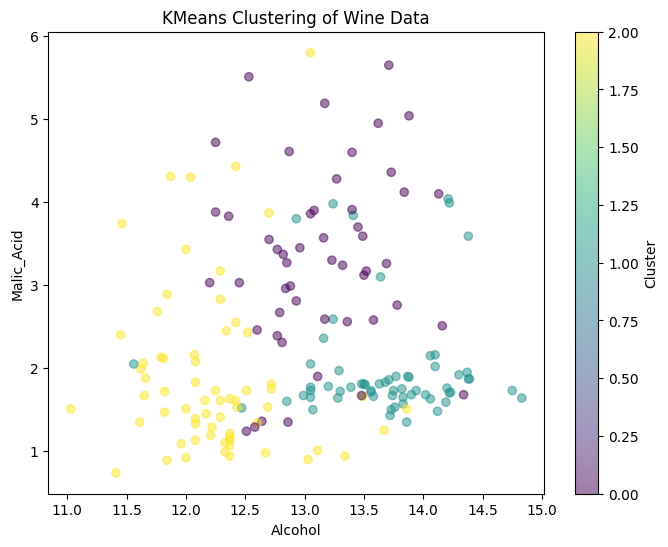

In [41]:
# Assuming you have a wine dataset loaded into wine_data

# Selecting two features for visualization (you can choose any two)
feature1 = 'Alcohol'
feature2 = 'Malic_Acid'

# Extracting the selected features
x = wine_data[feature1]
y = wine_data[feature2]

# Fit KMeans clustering on scaled data
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('KMeans Clustering of Wine Data')
plt.colorbar(label='Cluster')
plt.show()


##Principal Component Analysis

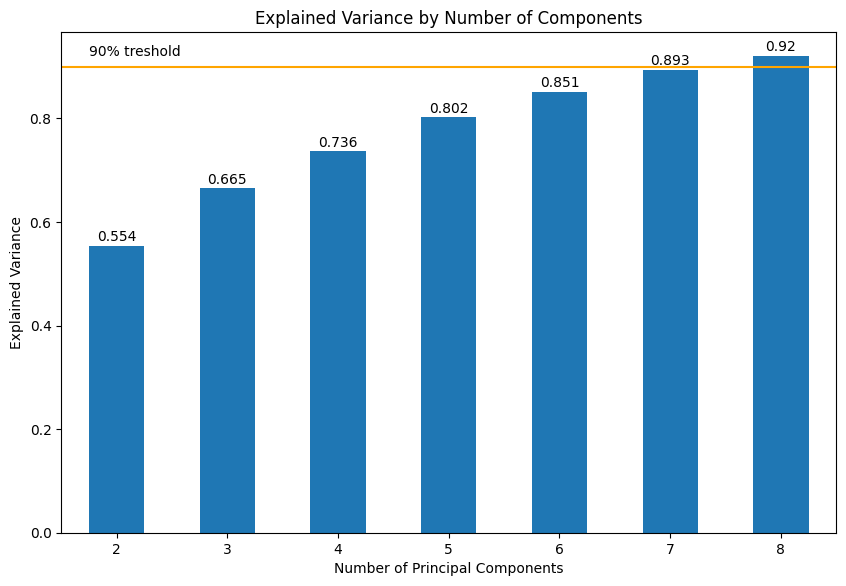

In [44]:
expl_var = {'N_components':[], 'Explained Variance':[]}

for p in range(2,9):
    pca = PCA(n_components=p)
    pca_data = pca.fit_transform(scaled_data)
    expl_var['N_components'].append(p)
    expl_var['Explained Variance'].append(pca.explained_variance_ratio_.sum())


expl_var = pd.DataFrame(expl_var)
barchart = expl_var.plot(x='N_components', y='Explained Variance', kind='bar',figsize=(10,6.5), legend=False)
for i in barchart.patches:
    barchart.annotate(round(i.get_height(),3), # get the frequency of the variable categories
                      xy = (i.get_x() + i.get_width()/2, i.get_height()*1.005), # set the coordinates for each label
                      ha='center', # set the horizontal alignment
                      va='top', # set the vertical alignment
                      xytext=(0,10), # default
                      textcoords='offset points', # default
                      fontsize=10) # set the font size
plt.plot(range(-1,10), np.full((11,), 0.9), color='orange')
plt.text(-0.25, 0.92, '90% treshold')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

In [45]:
# Perform K-means clustering on PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_data)

# Calculate silhouette score
silhouette_avg = silhouette_score(pca_data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3149696954705562


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Reducing the dataset dimensionality using PCA achieved a change in Silhouette Score.

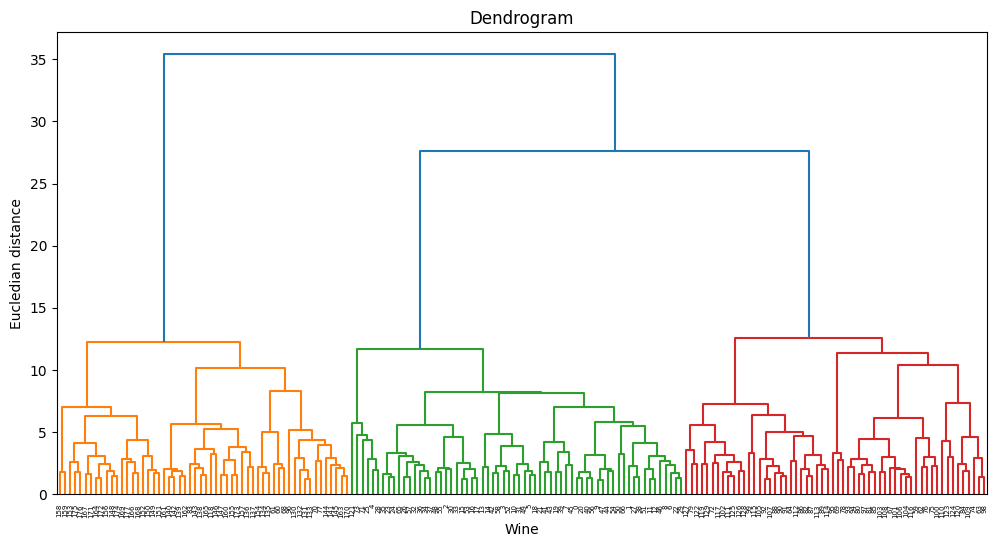

In [55]:
#opyimum number of clusters needed using dendrogram method
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(scaled_data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Eucledian distance')
plt.show()

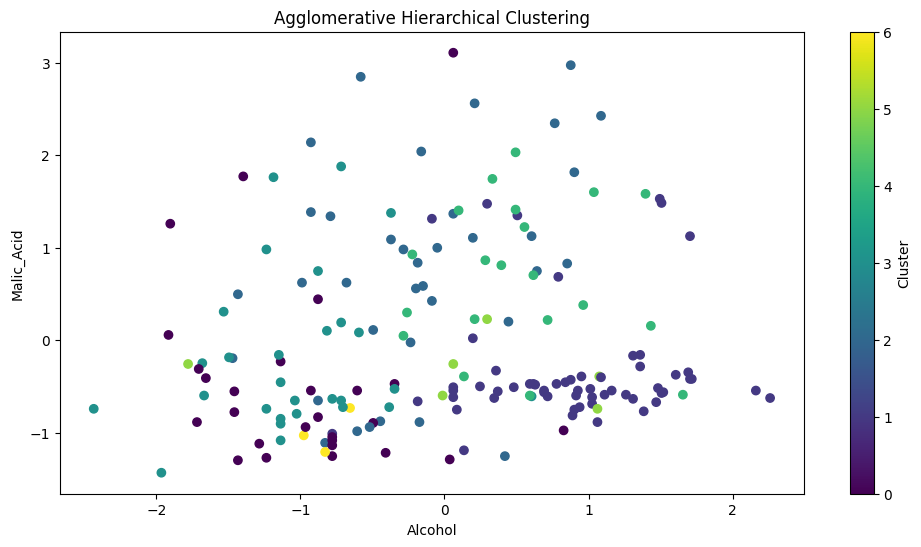

In [57]:
# Initialize and fit AgglomerativeClustering
# Adjust the parameters as needed (n_clusters, linkage)
agg_clustering = AgglomerativeClustering(n_clusters=7, linkage='ward')  # Example parameters, adjust as needed
clusters = agg_clustering.fit_predict(scaled_data)
# Extracting the selected features
x = wine_data[feature1]
y = wine_data[feature2]
# Visualize the clusters (if your data has more than 2 features, consider using PCA for visualization)
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=clusters, cmap='viridis')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Agglomerative Hierarchical Clustering')
plt.colorbar(label='Cluster')
plt.show()

##DBSCAN



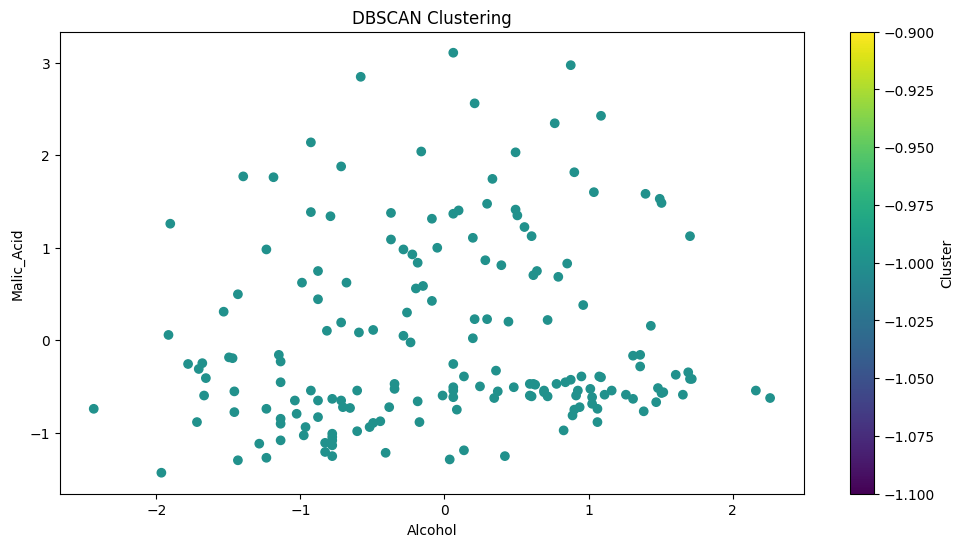

In [51]:
# Initialize and fit DBSCAN
# Adjust the parameters as needed (eps, min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Example parameters, adjust as needed
clusters = dbscan.fit_predict(scaled_data)
# Extracting the selected features
x = wine_data[feature1]
y = wine_data[feature2]
# Visualize the clusters (if your data has more than 2 features, consider using PCA for visualization)
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=clusters, cmap='viridis')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()